# Redes Neuronales II - Arquitectura, compilación, evaluación y mejora usando Keras. Ejemplo de uso con MINST.

<img src="./img/keras_logo.jpg" width="150">
<img src="./img/tfLogo.png" width="150">

### Importamos librerías

In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt


2025-11-20 12:59:35.681385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 12:59:35.801836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 12:59:38.172012: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
print(tf.__version__) # Versión de TensorFlow cargada

2.20.0


### Carga del dataset a analizar
Cargamos el dataset MINST con las imágenes de prendas de ropa

In [3]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Las imágenes de este dataset son matrices NumPy de 28 x 28 píxeles, con valores que van de 0 a 255. Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen.   
Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes

In [4]:
class_names = ['Camiseta/Top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Deportiva', 'Bolso','Botín']

Vamos a proceder al escalado de los valores de entrada, las citadas matrices de 28 x 28, a valores en el rango 0 - 1

In [5]:
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 

train_images = train_images / 255.0 
test_images = test_images / 255.0

Comprobamos la forma (shape) de los datos escalados:

In [6]:
print("train_images.shape:",train_images.shape) 
print("len(train_labels:",len(train_labels)) 
print("test_images.shape:",test_images.shape) 
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


Revisamos también sus etiquetas

In [7]:
train_labels 

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

Mostramos unos ejemplos por pantalla, en concreto, las 50 primeras muestras del dataset

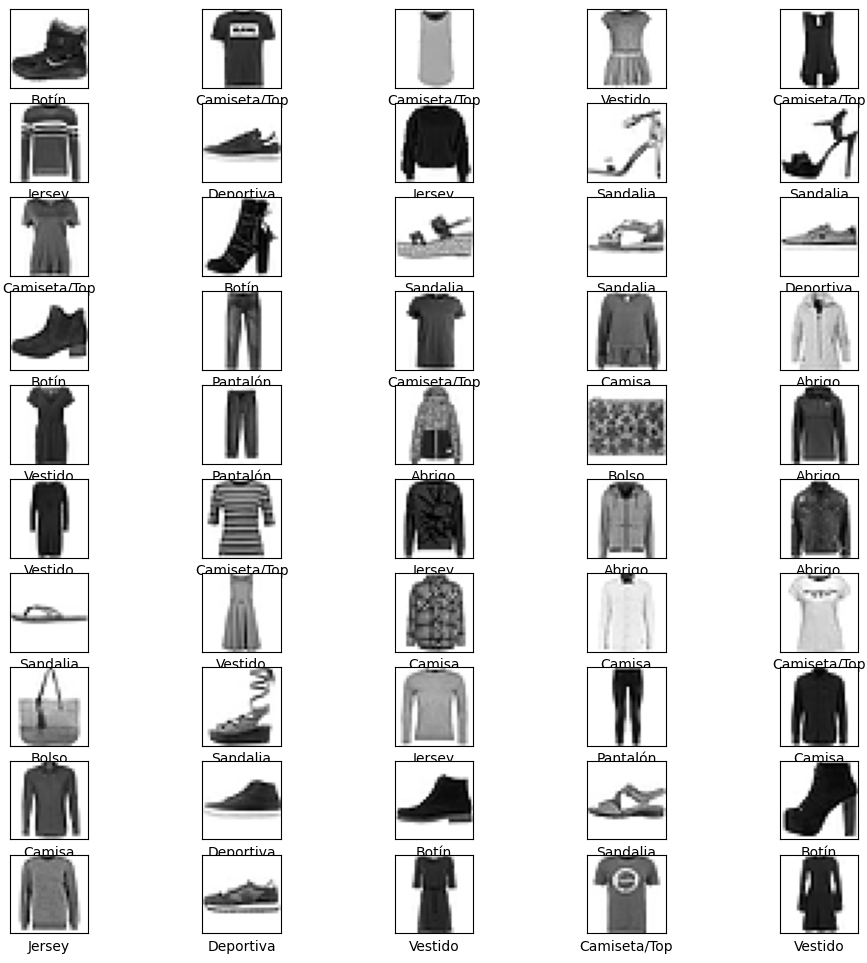

In [8]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary )
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construcción de la arquitectura del modelo  

Vamos a preprocesar los datos de entrada mediante el uso de la capa **Flatten()** que Keras nos facilita y que permite reconvertir las muestras de entrada de 28 × 28 a un vector (array) de 784 números (concatenando fila a fila).

In [9]:
# Importamos librería para montar estructura del modelo y capas.
from keras import Sequential
from keras.layers import  Dense, Flatten, Input

In [ ]:
model = Sequential([ 
            Input(shape=(28,28)), # Capa de entrada con forma 28x28 píxeles, que es el tamaño de las imágenes del dataset.(matriz de 28x28 píxeles)
            Flatten(), # Convertimos la imagen 2D de 28x28 píxeles en un vector 1D de 784 píxeles
            Dense(10, activation='sigmoid'),
            Dense(10, activation='softmax')
])

I0000 00:00:1763640035.312910  142623 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6243 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [11]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

None


Compilamos el modelo

In [12]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Entrenamiento del modelo

In [13]:
model.fit(train_images,train_labels, epochs=5)

Epoch 1/5


2025-11-20 13:01:01.318929: I external/local_xla/xla/service/service.cc:163] XLA service 0x72f8b80071a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-20 13:01:01.318971: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-11-20 13:01:01.343997: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-20 13:01:01.403917: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


  35/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1012 - loss: 2.4453

I0000 00:00:1763640064.594874  143027 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4517 - loss: 1.7911
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6586 - loss: 1.2667
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7092 - loss: 1.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7311 - loss: 0.9043
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7458 - loss: 0.8154


Evaluación del modelo

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7464 - loss: 0.7931
Test accuracy:  0.746399998664856


Predicciones

In [15]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


En predictions se ha almacenado la predicción de la etiqueta para cada imagen en el conjunto de prueba. Se analiza la primera predicción:

In [16]:
predictions[5]

array([1.65613834e-02, 8.76626313e-01, 1.48534114e-02, 4.73081581e-02,
       2.25833841e-02, 6.89943507e-03, 1.39281275e-02, 4.98112524e-04,
       5.55629784e-04, 1.86024059e-04], dtype=float32)

Para ver que etiqueta tiene el valor de confianza más alto usamos la función **argmax()**

In [17]:
np.argmax(predictions[5])

np.int64(1)

Por tanto, nuestro modelo está más seguro de que esta imagen son unos pantalones y, al examinar la etiqueta correcta que le corresponde, tenemos que la clasificación es cierta:

In [18]:
test_labels[5]

np.uint8(1)

### Visualización gráfica 

In [19]:
def plot_image(i, predictions_array, true_label, img): 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.imshow(img, cmap=plt.cm.binary) 
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: 
        color = 'blue' 
    else: 
        color = 'red' 
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color) 

def plot_value_array(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#007700") 
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array) 
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

Las etiquetas de predicción correcta se colorean de azul (para que se pueda ver en la edición en blanco y negro) y las etiquetas de predicción incorrecta se colorean de rojo (gris en la edición en blanco y negro). El número da el porcentaje (de 100) para la etiqueta predicha.

Recordemos la etiqueta para cada producto:

class_names = ['Camiseta/Top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Deportiva', 'Bolso','Botín']

|  Producto  | Clase |
|------------|-------|
|Camiseta/Top|   0   |
| Pantalón   |   1   |   
|   Jersey   |   2   |
|  Vestido   |   3   |
|   Abrigo   |   4   |
|  Sandalia  |   5   |
|   Camisa   |   6   |
| Deportiva  |   7   |
|   Bolso    |   8   |
|    Botín   |   9   |

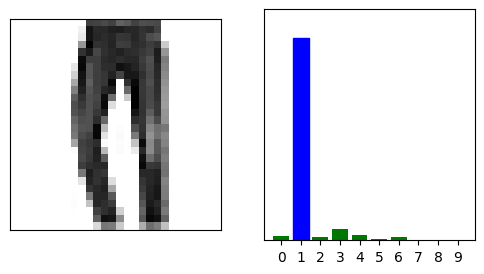

In [20]:
# Predicción para la imagen 5
i = 5 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i], test_labels) 
plt.show()

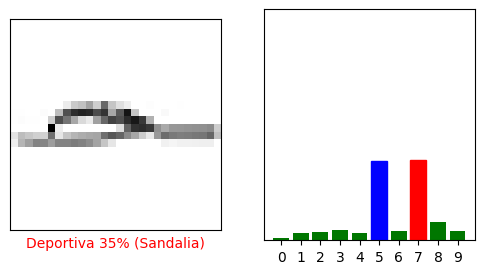

In [21]:
# Predicción para la imagen 8
i = 8
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i], test_labels) 
plt.show()

Visualizamos a continuación varias imágenes con sus predicciones. Para ello, se utiliza el código mostrado seguidamente. Se debe tener en cuenta que el modelo puede estar equivocado, incluso cuando tiene mucha confianza en la clasificación sobre una de las clases.

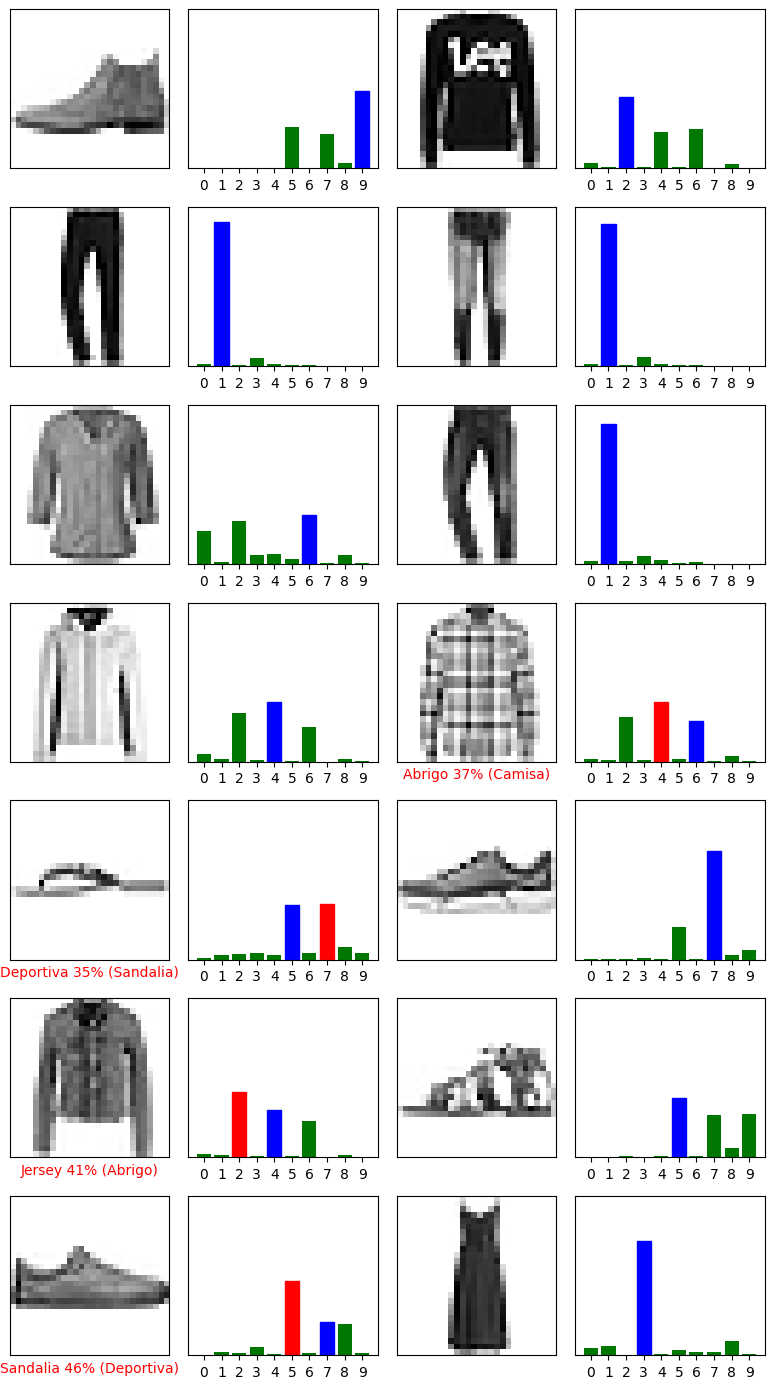

In [22]:
num_rows = 7 
num_cols = 2 
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions[i], test_labels, test_images) 
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions[i], test_labels) 
    plt.tight_layout()
plt.show()

 Las imágenes superiores son ejemplos de predicciones del modelo para el conjunto de datos Fashion-MNIST. Para cada imagen, el histograma representa la probabilidad de pertenencia de la clase correspondiente calculada por el modelo

### Mejora del modelo   

Se observa que la precisión obtenida de este modelo para estos datos (75 %) dista mucho de ser óptima. Podríamos decir que es un resultado esperado, puesto que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución.
Se procede a intentar, por ejemplo, cambiar el optimizador usado. Cabe recordar que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Una elección bastante habitual es el optimizador **sgd**, pero hay muchos más, como por ejemplo el optimizador **Adam**, que suele hacer converger mejor el proceso de optimización.

In [23]:
# Reconstruimos la arquitectura del modelo
model = Sequential([ 
            Input(shape=(28,28)),
            Flatten(), # Convertimos la imagen 2D de 28x28 píxeles en un vector 1D de 784 píxeles
            Dense(10, activation='sigmoid'),
            Dense(10, activation='softmax')
])


In [24]:
# Compilamos modificando el optimizador
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [25]:
# Entrenamos de nuevo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7238 - loss: 0.9958
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8209 - loss: 0.5596
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8381 - loss: 0.4782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8475 - loss: 0.4415
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8546 - loss: 0.4196


In [26]:
# Por último, evaluamos
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8331 - loss: 0.4659

Test accuracy: 0.8331000208854675


Cambiando solo el optimizador ya hemos mejorado un 9 % adicional la precisión del modelo. Esto indica que hay muchos elementos a tener en cuenta cuando se define y configura el proceso de aprendizaje de una red neuronal.

## <img src="img/by-nc.png" width="200">